# calore specifico dell'acqua parte C

### raccolta dati

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from interpolazione2 import RettaInterpolata

T = np.array([21.5,22,22.5,23,23.5,24,24.5,25,26,27,28,29.5,30.5,32,34,35.5])
t = np.arange(0,len(T)*60,60)
I = 3.5 # A
V = 15 # V
c_h20 = 4187 
m_h20 = 0.3 # kg
me = 0.014 #kg

### misura ideale


linearità: A+BX
B: 0.009595959595959595
sigmaB: 0.0010136301983274423
A: 21.30909090909091
sigmaA: 0.32467826838492364
sigmaY: 0.5524052092001985

chiquadro osservato: 1.8073485600794437
chiquadro ridotto: 0.22591857000993046
gradi di libertà: 8
vincoli: 2
        
Calore specifico:  4.16 ± 0.44


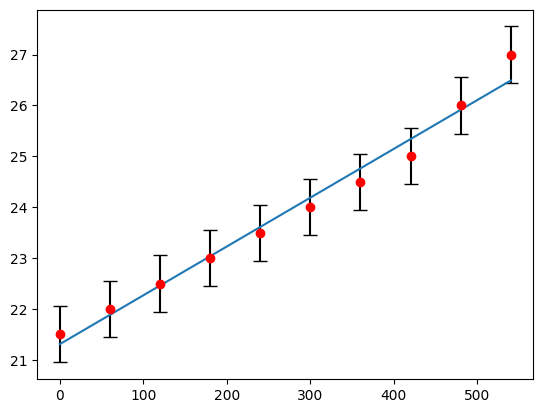

In [17]:
misure_buone = 10
r = RettaInterpolata(t[:misure_buone],T[:misure_buone],0.5)
print(r)
plt.errorbar(r.X,r.Y,fmt='o',yerr=r.sigmaY,ecolor='black',capsize=5,color='red')
plt.plot(r.best_x,r.best_y)
# plt.show()

J = (I*V)/(c_h20 * r.B * (m_h20 + me))
sigmaJ = J * r.sigmaB / r.B
print('Calore specifico: ',np.round(J,2),'±',np.round(sigmaJ,2))

### misura effettiva

calori specifici:  [4.79 4.79 4.79 4.79 4.79 4.79 4.49 4.16 3.88 3.54 3.32 3.1  2.86]
sigma calori specifici:  [3.39 2.14 1.52 1.15 0.91 0.74 0.56 0.44 0.36 0.3  0.26 0.22 0.21]


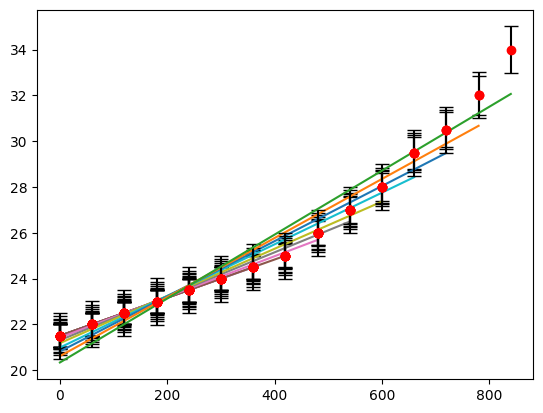

In [12]:
calori_specifici = [] # buffer
sigma_calori_specifici = [] # buffer

for i in range(3,len(T)):
    r = RettaInterpolata(t[:i], T[:i],0.5) # calcola retta considerando solo i primi punti
    J = (I*V)/(c_h20 * r.B * (m_h20 + me)) # calcola il valore del calore specifico 
    sigmaJ = J * r.sigmaB / r.B # calcola l'errore del calore specifico

    calori_specifici.append(J)
    sigma_calori_specifici.append(sigmaJ)

    plt.errorbar(r.X,r.Y,fmt='o',yerr=r.sigmaY,ecolor='black',capsize=5,color='red')
    plt.plot(r.best_x,r.best_y)
    # plt.show()

cs = np.array(calori_specifici)
scs = np.array(sigma_calori_specifici)

print("calori specifici: ", np.round(cs,2))
print("sigma calori specifici: ", np.round(scs,2)) # ho meno errori quando ho più punti

In [14]:
# media pesata per i calori specifici
w = (1/(scs**2))

calore_specifico = np.average(cs,weights=w) # media pesata dei valori ottenuti
errore_medio_calore_specifico = 1/np.sqrt(np.sum(w)) # errore della media pesata
print("calore_specifico: ", np.round(calore_specifico,2), '±',np.round(errore_medio_calore_specifico,2))


calore_specifico:  3.39 ± 0.11
